# Code for preprocessing the data for training a Classifier

###### Note : following code is an example for preprocessing the data for a classifier
###### this code is based on left shoulder and elbow coordinates

### Importing Necessary Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [66]:
df = pd.read_csv('data.csv')
df.head()

,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,2_y,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,-0.513346,-0.486864,0.978329,1.0,-0.537284,-0.468331,0.907438,1.0,-0.551415,-0.468160,...,-0.712293,0.004528,-0.563900,-1.402235,-0.169188,0.001297,-0.414179,-1.400190,-0.236010,0.001425
1,-0.516051,-0.487786,0.801669,1.0,-0.540958,-0.469537,0.745705,1.0,-0.554932,-0.469614,...,-0.586721,0.003706,-0.546744,-1.396654,-0.105789,0.000889,-0.416563,-1.392031,-0.177770,0.000804
2,-0.517325,-0.486723,0.786777,1.0,-0.542302,-0.468774,0.730178,1.0,-0.556188,-0.468928,...,-0.572160,0.004798,-0.549911,-1.392735,-0.099640,0.001099,-0.424577,-1.388623,-0.168463,0.000999
3,-0.517781,-0.486719,0.770728,1.0,-0.542295,-0.468731,0.714361,1.0,-0.556079,-0.468834,...,-0.563850,0.004306,-0.552028,-1.392125,-0.066083,0.000939,-0.423960,-1.386563,-0.159205,0.000809
4,-0.519239,-0.487284,0.833225,1.0,-0.543011,-0.469002,0.772886,1.0,-0.556789,-0.469014,...,-0.574910,0.003707,-0.566962,-1.390860,-0.077285,0.000848,-0.432768,-1.386580,-0.154454,0.000748


In [67]:
#collecting metadata
data = df[['11_x', '11_y', '13_x', '13_y']]

In [68]:
#renaming columns
data.columns = ['left_shoulder_X', 'left_shoulder_Y',
                'left_elbow_X', 'left_elbow_Y']

In [69]:
#useful metadata
data.head()

,left_shoulder_X,left_shoulder_Y,left_elbow_X,left_elbow_Y
0,-0.701167,-0.579701,-0.946057,-0.599737
1,-0.703238,-0.579433,-0.941791,-0.608207
2,-0.700262,-0.579484,-0.940807,-0.608857
3,-0.699332,-0.578418,-0.936533,-0.613209
4,-0.701886,-0.577890,-0.936760,-0.610650


### Preprocess

In [70]:
#getting the values
x1 = data['left_elbow_X']
y1 = data['left_elbow_Y']
x2 = data['left_shoulder_X']
y2 = data['left_shoulder_Y']

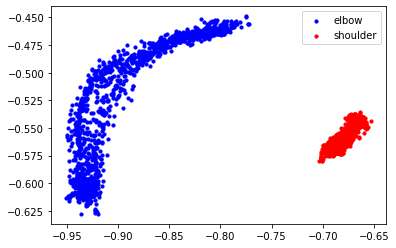

In [71]:
#displaying raw metadata
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1, y1, s = 10, c = 'b', label = 'elbow')
ax1.scatter(x2, y2, s = 10, c = 'r', label = 'shoulder')
plt.legend(loc='upper right');
plt.show()

In [72]:
#calculating mean of the shoulder, cause its the origin in this scenario
dx = x2.mean()
dy = y2.mean()

In [73]:
#some important functions


#slope formula
def slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

#rounding off the values for elbow coordinates into an arc
def roundoff(x1, y1, x2, y2):
    s = slope(x1, y1, x2, y2)
    d = 1
    x = d * ((d**2) / (1+s**2))**0.5
    y = s*x
    return -round(x, 3), -round(y, 3)

In [74]:
#rounded-off data
a, b = roundoff(x2, y2, x1, y1)

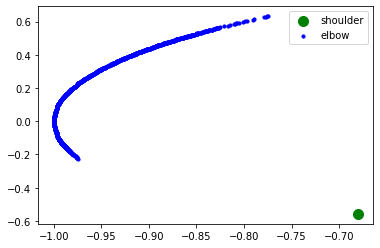

In [75]:
#displaying rounded data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(dx, dy, s = 100, c = 'green', label = 'shoulder')
ax1.scatter(a, b, s = 10, c = 'b', label = 'elbow')
plt.legend(loc='upper right');
plt.show()

#### Generating Fake Data

In [76]:
fakex = []
fakey = []
def roundoff_fake():
    for i in np.arange(-0.600, 1.000, 0.001):
        for j in np.arange(-1.000, 1.000, 0.001):
            if float("{0:.3}".format(i**2 + j**2)) == 1 :
                fakex.append(i)
                fakey.append(j)
roundoff_fake()

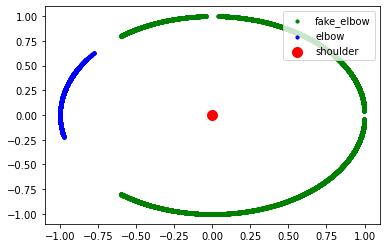

In [77]:
#displaying fake rounded data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(fakex, fakey, s = 10, c = 'green', label = 'fake_elbow')
ax1.scatter(a, b, s = 10, c = 'b', label = 'elbow')
ax1.scatter(0, 0, s = 100, c = 'red', label = 'shoulder')
plt.legend(loc='upper right');
plt.show()

#### Converting to a DataFrame

In [78]:
x = []
y = []
z = []

x.extend(a)
y.extend(b)
z1 = [1]*len(x)
z.extend(z1)

x.extend(fakex)
y.extend(fakey)
z2 = [0]*len(fakex)
z.extend(z2)

final_data = pd.DataFrame({'x': x,'y': y, 'z': z})

In [79]:
final_data.head()

,x,y,z
0,-0.997,-0.082,1
1,-0.993,-0.120,1
2,-0.993,-0.121,1
3,-0.989,-0.145,1
4,-0.990,-0.138,1


### Reference for Training a Classifier

In [80]:
x= final_data.iloc[:, :2].values
y= final_data.iloc[:, 2].values

In [81]:
x

array([[-0.997, -0.082],
       [-0.993, -0.12 ],
       [-0.993, -0.121],
       ...,
       [ 0.999,  0.081],
       [ 0.999,  0.082],
       [ 0.999,  0.083]])

In [82]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Let's import keras & keras tuner 

In [83]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

## **Now** let's define the range for number of layers and nodes.

In [84]:
def reg_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units'+str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1,activation='softmax'))
    model.compile(
                  optimizer=keras.optimizers.Adam(
                                                  hp.Choice('learning_rate',[1e-2,1e-3,1e-4])
                  ),
                  loss='binary_crossentropy',
                  metrics=['accuracy']
    )
    return model

# **Let the search begin.**

In [85]:
tuner=RandomSearch(
                   reg_model,
                   objective='val_accuracy',
                   max_trials=5,
                   executions_per_trial=3,
                   directory='project',
                   project_name='Pose estimation'
)

INFO:tensorflow:Reloading Oracle from existing project project/Pose estimation/oracle.json
INFO:tensorflow:Reloading Tuner from project/Pose estimation/tuner0.json


In [86]:
tuner.search_space_summary()

Search space summary
Default search space size: 18
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units6 (Int)
{'default': None, 'condition

# Now let's splitting the data into training and testing set.

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [88]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


# Let's get the best model.

In [89]:
tuner.results_summary()

Results summary
Results in project/Pose estimation
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 15
units0: 224
units1: 384
learning_rate: 0.001
units2: 160
units3: 192
units4: 256
units5: 224
units6: 256
units7: 160
units8: 32
units9: 256
units10: 352
units11: 160
units12: 512
units13: 32
units14: 448
Score: 0.9069092869758606
Trial summary
Hyperparameters:
num_layers: 15
units0: 96
units1: 384
learning_rate: 0.01
units2: 416
units3: 320
units4: 32
units5: 32
units6: 32
units7: 32
units8: 32
units9: 32
units10: 32
units11: 32
units12: 32
units13: 32
units14: 32
Score: 0.9069092869758606
Trial summary
Hyperparameters:
num_layers: 10
units0: 480
units1: 320
learning_rate: 0.001
units2: 320
units3: 448
units4: 224
units5: 96
units6: 256
units7: 448
units8: 128
units9: 320
units10: 256
units11: 256
units12: 224
units13: 224
units14: 320
Score: 0.9069092869758606
Trial summary
Hyperparameters:
num_layers: 14
units0: 320
un

# Let's define our model with 15 layers.

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classification_model():
    # create model
    model = Sequential()

    model.add(Dense(96,activation='relu', input_shape=(2,)))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(416, activation='relu'))
    model.add(Dense(320, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [91]:
model=classification_model()

In [92]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
194/194 - 7s - loss: 0.0867 - accuracy: 0.9654 - val_loss: 0.0390 - val_accuracy: 0.9861
Epoch 2/100
194/194 - 4s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.6783e-06 - val_accuracy: 1.0000
Epoch 3/100
194/194 - 4s - loss: 8.9628e-07 - accuracy: 1.0000 - val_loss: 4.6777e-07 - val_accuracy: 1.0000
Epoch 4/100
194/194 - 4s - loss: 3.0935e-07 - accuracy: 1.0000 - val_loss: 2.1352e-07 - val_accuracy: 1.0000
Epoch 5/100
194/194 - 2s - loss: 1.5204e-07 - accuracy: 1.0000 - val_loss: 1.0797e-07 - val_accuracy: 1.0000
Epoch 6/100
194/194 - 1s - loss: 6.4253e-08 - accuracy: 1.0000 - val_loss: 3.0317e-08 - val_accuracy: 1.0000
Epoch 7/100
194/194 - 1s - loss: 2.0027e-08 - accuracy: 1.0000 - val_loss: 1.1925e-08 - val_accuracy: 1.0000
Epoch 8/100
194/194 - 1s - loss: 9.8452e-09 - accuracy: 1.0000 - val_loss: 6.8553e-09 - val_accuracy: 1.0000
Epoch 9/100
194/194 - 1s - loss: 6.3032e-09 - accuracy: 1.0000 - val_loss: 4.4926e-09 - val_accuracy: 1.0000
Epoch 10/100
194/194 - 1s - los

# Lets predict our output with testing data.

In [93]:
predict=model.predict(X_test)
print(predict)
y_test.shape
predict.shape

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 ...
 [0.0000000e+00]
 [1.9058817e-35]
 [1.7111516e-38]]


(3792, 1)

In [94]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy[1]*100)

119/119 [==============================] - 1s 8ms/step - loss: 1.5447e-11 - accuracy: 1.0000
100.0


# We got 100% accuracy!!!!!

In [95]:
import numpy as np
predict=predict.reshape(-1)
predict.shape

(3792,)

In [96]:
X_test[:,0].shape

(3792,)

In [97]:
predict.shape

(3792,)

In [ ]:
import matplotlib.pyplot as plt

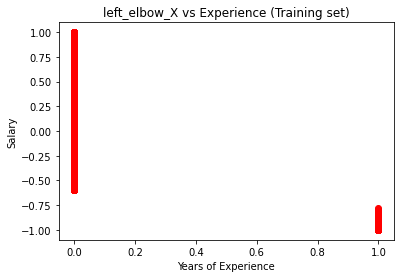

In [98]:

plt.scatter(predict,X_test[:,0], color = "red")
plt.title("elbow vs shoulder (Predicted data)")
plt.xlabel("Elbow fake or real")
plt.ylabel("Shoulder")
plt.show()

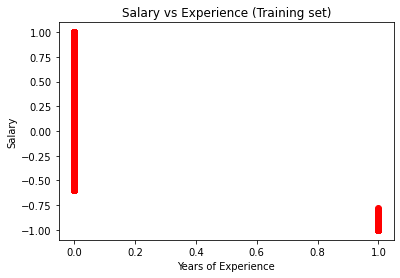

In [99]:
plt.scatter(y_test,X_test[:,0], color = "red")
plt.title("elbow vs shoulder (Testing data)")
plt.xlabel("Elbow fake or real")
plt.ylabel("Shoulder")
plt.show()